In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn, sys
import scipy

# Versions

In [2]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), 
             ('Scipy', scipy), ('Sklearn', sklearn))

print("Python version:", sys.version, '\n')
for lib in libraries:
    print('{0} version: {1}'.format(lib[0], lib[1].__version__))

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)] 

Matplotlib version: 3.1.0
Numpy version: 1.16.4
Scipy version: 1.3.0
Sklearn version: 0.21.2


# Introduction

Pretend you're a pediatrician and that your patients come in for monthly checkups. You've been keeping a log of each child's weight at each checkup for the first 12 months. You've accumulated a good bit of data that looks like this. 

## Simulate Data

In [3]:
# reproducibility
np.random.seed(10)

# generate data
babies = range(10)
months = np.arange(13)
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))#adding some noise
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]

In [4]:
babies

range(0, 10)

In [5]:
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
np.random.normal(loc=0, scale=20)

-4.598932875494457

In [7]:
data

[(0, 122.63173008259037),
 (0, 110.30557948796812),
 (0, 65.09199415777464),
 (0, 95.83232300142956),
 (0, 108.42671947780961),
 (0, 81.59828878562206),
 (0, 101.31023171384238),
 (0, 98.17097051429938),
 (0, 96.08582861868067),
 (0, 92.50799578814117),
 (1, 129.36052379907196),
 (1, 144.76074747624423),
 (1, 101.39868658966473),
 (1, 141.2654815596541),
 (1, 125.2726026024932),
 (1, 129.60275225660695),
 (1, 97.96795576337912),
 (1, 123.40273756897271),
 (1, 150.39074003673164),
 (1, 99.10390228429449),
 (2, 105.84543438684187),
 (2, 110.53255408202186),
 (2, 150.72140328001103),
 (2, 193.09934661422193),
 (2, 167.87382506818847),
 (2, 178.85244426615657),
 (2, 147.3829843167049),
 (2, 173.3599275418715),
 (2, 139.9750402406844),
 (2, 157.66408369719278),
 (3, 164.75365622652862),
 (3, 159.1138197178904),
 (3, 172.75416591519902),
 (3, 160.57715970145324),
 (3, 196.26946161726954),
 (3, 174.00026558466186),
 (3, 178.10419976504696),
 (3, 163.3473532582894),
 (3, 195.2294452751031),
 (

## Plot Data

In [8]:
weight_data[:5]

[122.63173008259037,
 110.30557948796812,
 65.09199415777464,
 95.83232300142956,
 108.42671947780961]

In [9]:
month_data[:5]

[0, 0, 0, 0, 0]

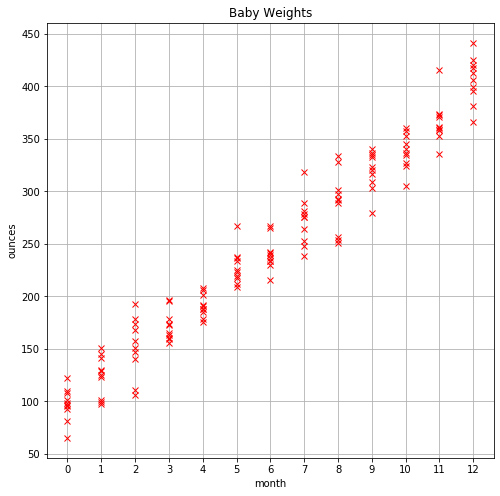

In [10]:
plt.figure(figsize=(8,8))
plt.plot(month_data, weight_data, 'rx')
plt.title('Baby Weights')
plt.xlabel('month')
plt.ylabel('ounces')
plt.xticks(months)
plt.grid();

There appears to be a strong linear pattern here. It'd be nice if you could create a model that captures that pattern. That way you could use it as a means to compare new patients to see how they're progressing and if there are any abnormalities in weight (under or over) that you should be concerned about. But how to create the model?

Linear Regression to the rescue!

## Overview

- Linear Regression is really quite simple and surprisingly powerful. 
- In this simple case, we have a single predictor variable called month. Linear Regression with a single variable (aka feature) is called Univariate Linear Regression. 
- The output of Linear Regression is an estimate of the outcome variable (aka target), which in this case is a baby's weight in ounces.

- The equation of our model looks like this:

    $\hat{weight} = intercept + (month * slope) + \epsilon$

Notice the hat on weight. This signifies that our model creates an estimate of the target variable. It is not the actual value of a given child. It's important to remember that. 

The intercept is the expected value of child at birth. This is the same as saying a child at month 0 is expected to weigh the value of the intercept. Another way to think about it is by looking at the equation of the model. The slope is nonzero. We can see that in the graph above. Therefore, when month is 0, the intercept is the model's estimate for a baby's weight at birth because 0 times slope equals 0 which leaves us with the intercept and another term we'll get to shortly. 

For nonbirth weights, we simply add the month number times the slope to the intercept. 

You may be wondering about that funny looking *e* called epsilon. That signifies error. Error comes in two flavors: reducible and irreducible. Reducible error is error that results when your model is not extracting all the structure or pattern in the data. Irreducible error is what's left over. For nontrivial datasets, there will always be irreducible error, so don't expect to create a model that perfectly predicts every example.

It's important to keep in mind that models are an **approximation** of reality. Rarely does a model take all factors into account. In the case of babies, we're using months as a way to estimate a baby's weight in ounces. Obviously, genetics and environmental factors play a major role in a baby's weight but using age in months is a great proxy in this contrived case.

`Famous mathematician George E. P. Box said it best when he said:`
`All models are wrong; some models are useful.`


At this point you should have a burning question on the tip of your mind: how the heck do we find the intercept and slope?

Great question!

The short answer is there are two ways. 
    There is an **analytical solution**.This means there is an exact solution like solving 2x=6. 
    There is also a **numerical approximation** method known as *Gradient Descent*. 

Now you're likely wondering why anyone would choose to use a numerical approximation method like Gradient Descent when there exists an exact solution, but it turns out there is a good reason for this. 

If your data is relatively small meaning it will fit into memory, then the analytical solution is your best bet. If, however, your data is large and will not fit into memory, you're stuck unless you use a numerical approach like Gradient Descent. 

I won't go into any more detail on Gradient Descent here as that will be a discussion for another time. However, we can now discuss how to find the intercept and slope terms.

## Terminology

It's time to get more formal. 

Let *X* signify the data in matrix form. Unsurprisingly, it is known as the **data matrix**.

Let *y* signify observed values in vector form. It is known as the **target** (aka the thing we're trying to predict).

The intercept and slope are known as **parameters** or **coefficients**. You will often see them labeled as $\beta$ or $\theta$. The machine learning literature tends to use $\theta's$ so that's what I'm partial to. Hence, I will use $\theta's$ from here on out. Just know that statistians and others use $\beta's$ in the same way.

We can create a vector of $\theta's$ where intercept=$\theta_{0}$ and slope=$\theta_{1}$ like so:

>$\theta = [\theta_{0}, \theta_{1}$]

## Finding Parameters

### Ordinary Least Squares

The analytical solution to finding the values of the parameters is straight forward.

The equation is:
> $\hat{\theta}$ = $(X^{T}X)^{-1}X^{T}y$

I'm assuming you're comfortable with linear algebra. If you're unfamiliar with vector or matrix transposes, vector or matrix multiplication, or matrix inverses, please review those topics separately.

Now let's write some code to find the parameters using a little bit of NumPy.

In [11]:
# Setup
X = np.array(month_data)
X = np.c_[np.ones(X.shape[0]), X] # little trick to add vector of 1's
y = np.array(weight_data)

Technical note: the little trick in the cell above is a common machine learning trick. It creates a vector of 1's and appends to our *month_data* vector, creating a 2D data matrix.

In [12]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    
    return np.dot(inv_xtx, xty)

In [13]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 97.94349022705876 | slope: 24.68016506543873


So we found that $\theta_{0}$=97.9435 and $\theta_{1}$=24.6802. 

Now's as a good a time as any to plot our line over our data to see how we did.

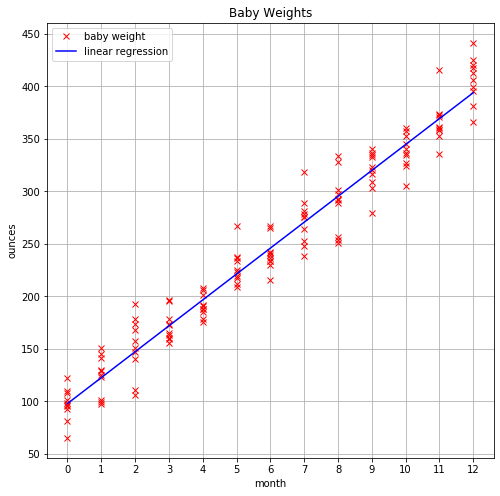

In [14]:
theta0 = params[0]
theta1 = params[1]
model = theta0 + np.dot(theta1, months)

plt.figure(figsize=(8,8))
plt.plot(month_data, weight_data, 'rx', label='baby weight')
plt.plot(months, model, 'b', label='linear regression')
plt.title('Baby Weights')
plt.xlabel('month')
plt.ylabel('ounces')
plt.xticks(months)
plt.legend()
plt.grid();

Looks pretty good!

I'd be remiss if I didn't show you a few ways to find the parameters using sklearn and scipy so here we go.

### Using Sklearn Machine Learning Package

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
sklearn_params = np.array([lr.intercept_, lr.coef_[1]])
print(sklearn_params)

[97.94349023 24.68016507]


### Using Scipy Package
* SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, below core packages are part of this package.
    1. Numpy
    2. Pandas
    3. Matplotlib
    4. Sympy
    5. ...etc


In [16]:
from scipy.linalg import lstsq
sp_params, residue, rank, s = lstsq(X, y)
print(sp_params)

[97.94349023 24.68016507]


### Simple Linear regression(one variable)
* Using co-variance and variance to calculate parameters b0 and b1

In [17]:
import numpy as np

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar_sum = 0.0
    for i in range(len(x)):
        covar_sum += (x[i] - mean_x) * (y[i] - mean_y)
    covar= covar_sum/len(x)      
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return np.mean([(x-mean)**2 for x in values])

x_mean=np.mean(np.array(month_data))
y_mean=np.mean(np.array(weight_data))

b1 = covariance(month_data, x_mean, weight_data, y_mean) / variance(month_data, x_mean)
b0 = np.mean(weight_data) - b1 * np.mean(month_data)
var_parm=(b0,b1)
print(b0,b1)

97.94349022705862 24.680165065438736


#### Check parameters are the same for all 3 methods

In [18]:
np.allclose(params, sklearn_params, sp_params,var_parm)

True

## Multivariate Linear Regression
* Simple words working with `multiple independent variables`

We're ready to tackle more interesting problems now. Suppose you were keeping track not only of which month you collected weights but also the gender of the child. So for each monthly checkup, you have month, gender, and weight. In this case, month and gender are features and weight is still the target. 

The beautiful part is that all the hard work we've done thus far transfers over seamlessly. We can solve this problem. We simply need to add an additional parameter for each new feature. Hooray!

### Add GENDER Feature

In [26]:
np.random.binomial?

In [22]:
lbabies

range(0, 10)

In [24]:
len(babies)

10

In [23]:
months

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [25]:
len(months)

13

In [19]:
gender = np.random.binomial(n=1, p=0.5, size=len(babies)*len(months)) ## male=0, female=1
X = np.c_[X, gender]

In [20]:
X

array([[ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  0.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  0.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 1.,  4.,  0.],
       [ 1.,  4.

### Plot Data in 3D

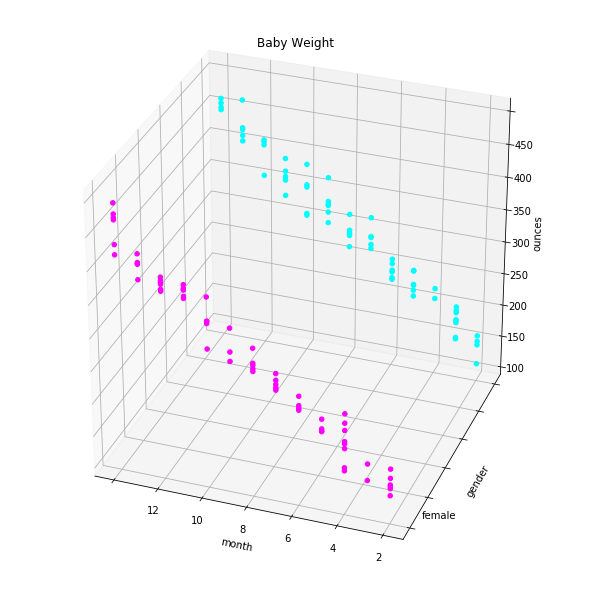

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=30, azim=110)
ax.scatter(X[:, 1], X[:, 2], y, c=gender, cmap='cool', depthshade=False)
ax.set_title("Baby Weight")
ax.set_xlabel("month")
ax.w_xaxis.set_ticklabels(months[::2])
ax.set_ylabel("gender")
ax.w_yaxis.set_ticklabels(['male','','','','','female'])  
ax.set_zlabel("ounces")
ax.w_zaxis.set_ticklabels(range(50,500,50))

plt.show()

### Fitting plane

Instead of finding a best fitting line of the data, we're looking for the best `fitting plane`. We solve the same way. Watch this.

#### OLS

In [89]:
# linear algebra
multivariate_params = ols(X,y)
print(multivariate_params)

[99.43829739 24.69804553 -3.25424525]


#### sklearn

In [90]:
# sklearn
mlr = LinearRegression()
mlr.fit(X, y)
sklearn_multi_params = np.array([mlr.intercept_, mlr.coef_[1], mlr.coef_[2]])
print(sklearn_multi_params)

[99.43829739 24.69804553 -3.25424525]


#### scipy

In [91]:
# scipy
sp_multi_params, residue, rank, s = lstsq(X, y)
print(sp_multi_params)

[99.43829739 24.69804553 -3.25424525]


#### Plot again w/model

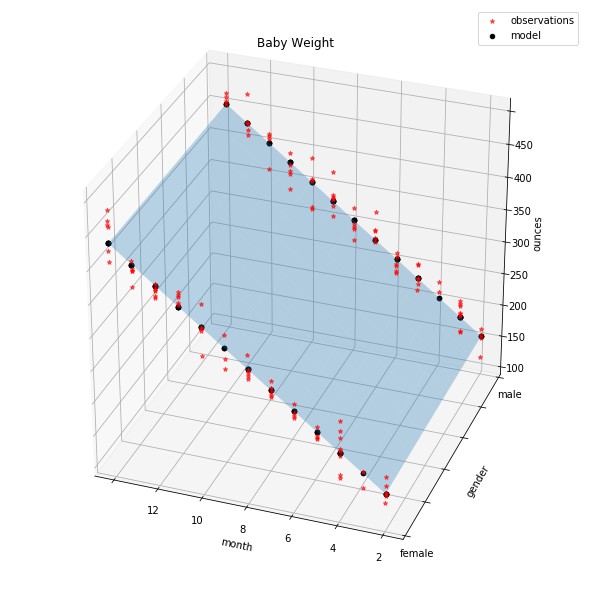

In [96]:
# model estimates
multi_model = np.dot(X, multivariate_params)

# setup
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=30, azim=110)
ax.set_title("Baby Weight")
ax.set_xlabel("month")
ax.w_xaxis.set_ticklabels(months[::2])
ax.set_ylabel("gender")
ax.set_ylim3d(0, 1)
ax.w_yaxis.set_ticklabels(['male','','','','','female'])  
ax.set_zlabel("ounces")
ax.w_zaxis.set_ticklabels(range(50,500,50))

# scatter plots
scatter1 = ax.scatter(X[:,1], X[:,2], y, 
                      c='red', 
                      marker='*', 
                      depthshade=False,
                      label='observations',
                      alpha=0.6)
scatter2 = ax.scatter3D(X[:,1], X[:,2], multi_model, c='k', depthshade=False, label='model')

# plane plot
xs, ys = np.meshgrid(months, np.arange(0, 1.125, 0.125))
z = multivariate_params[0] + \
    np.dot(xs, multivariate_params[1]) + \
    np.dot(ys, multivariate_params[2])
ax.plot_surface(xs, ys, z, alpha=0.3, shade=False)

plt.legend(fancybox=True)

plt.show()

The red dots indicate actual observations of baby weights. The light blue plane shows the solution space of our model. Actually, that's not entirely true. If we swapped the indicator feature gender with a continuous one, the plane would indeed represent the full range of solutions. However, because gender can only take values 0 or 1, our solution ends up being two lines, subsets of the plane, indicated by the black dots.

## Where to go from here?

We talked about Linear Regression terminology and how to find its model parameters, at least analytically. What we haven't talked about yet is metrics, model assumptions, potential pitfalls, and how to handle them. We'll pick up next time with metrics so stay tuned!